## WordCloud (Nube de Palabras) con Python

Para identificar palabras relevantes o descubrir tendencias en cadenas de texto es posible graficar un una *nube de palabras* con alguna columna de tipo *string*  en un *DataSet*

Por lo tanto, para aplicarlo es necesario un *DataSet* con alguna columna tipo *String*

Twitter permite descargar los Tweets propios exportándolos a un archivo de texto (csv). Este archivo puede ser leído con **Pandas**y posteriormente graficado utilizando el paquete **WordCloud**. Para hacerlo es necesario haber instalado previamente al menos matplotlib, pandas y wordcloud.

Los comandos para instalar estos módulos son:
* *pip install matplotlib*
* *pip install pandas*
* *pip install wordcloud*

In [1]:
# Primero importamos los paquetes y módulos ya mencionados
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

El archivo .csv que Twitter permite exportar contiene los Tweets propios en un período de tiempo limitado. El que se ha descargado acá es de los últimos 28 días. Contados hacia atrás desde la fecha 6 de noviembre 2021, para la cuenta **@rdvillal** es decir, la mía. La ruta de lectura utilizada en el comando debe ser adaptada al sistema en que se replique el código. El archivo será leído con la función *read_csv* de la librería **Pandas** como de costumbre y colocado en un DataFrame nombrado **df_tw**

In [3]:
# Lectura de los datos. El dataset es un archivo separado por comas descargado de Twitter previamente
df_tw = pd.read_csv('C:/HOME/DATA ANALYSIS/tweet_activity_metrics_rdvillal_20211010_20211107_es.csv')
# utilizando este comando se obtiene información de las columnas que el archivo contiene y otros metadatos relacionados
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ID del Tweet                                            47 non-null     int64  
 1   Enlace permanente de Tweet                              47 non-null     object 
 2   Texto del Tweet                                         47 non-null     object 
 3   hora                                                    47 non-null     object 
 4   impresiones                                             47 non-null     float64
 5   interacciones                                           47 non-null     float64
 6   tasa de interacción                                     47 non-null     float64
 7   retweets                                                47 non-null     float64
 8   respuestas                                

Siempre vale la pena inspeccionar brevemente el DataSet para entender los datos con los que se está trabajando, en este caso por ejemplo con las funciones *info* y *head* de la librería **Pandas** podemos hacer esta tarea

In [4]:
# Leemos las primeras cinco filas del DataFrame de Pandas
df_tw.head(5) 

,ID del Tweet,Enlace permanente de Tweet,Texto del Tweet,hora,impresiones,interacciones,tasa de interacción,retweets,respuestas,me gusta,...,clics de etiquetas promocionado,ampliaciones de detalles promocionado,clics en enlaces permanentes promocionado,Se abre la aplicación promocionado,descargas de app promocionado,seguimientos promocionado,enviar Tweet por correo electrónico promocionado,marcar teléfono promocionado,visualizaciones multimedia promocionado,interacciones con el contenido multimedia promocionado
0,1456978090677219329,https://twitter.com/rdvillal/status/1456978090...,Me impresiona la sensibilidad cantora del mini...,2021-11-06 13:33 +0000,49.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1456973970369130500,https://twitter.com/rdvillal/status/1456973970...,Me quieren… cómo me quieren… me quieren enterr...,2021-11-06 13:17 +0000,35.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
2,1454826670960041984,https://twitter.com/rdvillal/status/1454826670...,Cada vez que alguien me pregunta ¿estás ocupad...,2021-10-31 15:04 +0000,240.0,17.0,0.070833,0.0,0.0,7.0,...,-,-,-,-,-,-,-,-,-,-
3,1454826145636098048,https://twitter.com/rdvillal/status/1454826145...,Por ahí he leído que hay un juramento golondro...,2021-10-31 15:02 +0000,69.0,3.0,0.043478,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
4,1454825678059212804,https://twitter.com/rdvillal/status/1454825678...,Cómo no lo vieron si trae la traición en las c...,2021-10-31 15:00 +0000,70.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-


Luego de leer los datos, se prepara un arreglo de palabras que serán descartadas de este tipo de análisis ya que suelen ser muy utilizadas en el lenguaje y le restan valor al análisis, acá se define un pequeño listado pero este puede ser modificado y enriquecido en función del contexto. En inglés, el módulo WordCloud cuenta ya con una lista llamada **STOPWORDS** ya construida para este tipo de casos, sin embargo para este caso como la información analizada está en español se ha personalizado. Valdría la pena averiguar si ya existen arreglos construidos y disponibles a nivel público para mejorar este código.

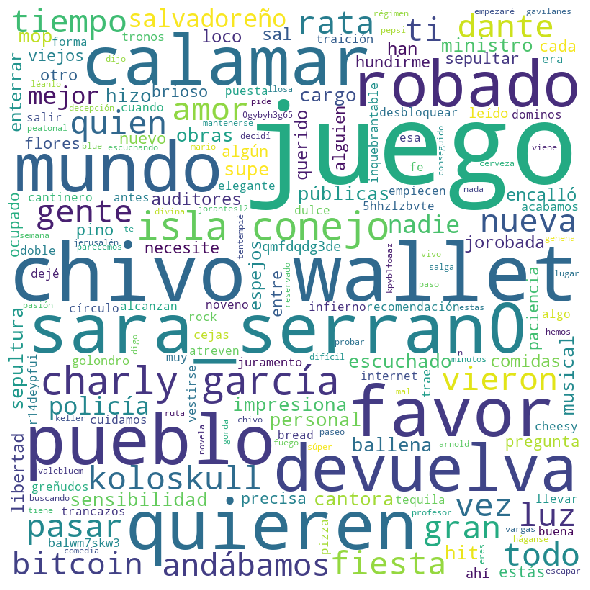

In [6]:
tweet_words = ''
# se definen las palabras a eliminar que se consideraron conjunciones, artículos, pronombres y palabras irrelevantes 
# para el análisis que se quiere realizar
stopwords = set(['de','la','para','y','este','tu','nos','el','los','las','es','esta','se','t','https','su','co','como','ya','más',
                 'lo','ese','del','por','a','que','desde','con','sin','en','ha','e','no','solo','un','una','uno','me','está',
                'cómo','así','hay','pero','al','mis','mí','yo','o','sé','ahora','si','sí','además','poco','mucho','he','será'])
 
# se itera sobre el archivo csv
for val in df_tw['Texto del Tweet']:
     
    # casteo a string a la variable val
    val = str(val)
 
    # se parte el valor
    tokens = val.split()
     
    # Convierte cada token a minúsculas
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    tweet_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweet_words)
 
# graficar la imagen del WordCloud                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()